Author: Dominique Grimes

Time Series Modeling

# Initial imports and dataframe setup

In [1]:
# Import libraries & settings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pm
import warnings
from pandas.errors import SettingWithCopyWarning
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import SimpleExpSmoothing
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
pd.set_option('display.max_rows', None)

In [2]:
# Load csv file into dataframe variable
df = pd.read_csv('us_retail_sales.csv')

In [3]:
# View dataframe
df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
25,2017,416081,415503,414620,416889,414540,416505,416744.0,417179.0,426501.0,426933.0,431158.0,433282.0
26,2018,432148,434106,433232,435610,439996,438191,440703.0,439278.0,438985.0,444038.0,445242.0,434803.0
27,2019,440751,439996,447167,448709,449552,450927,454012.0,456500.0,452849.0,455486.0,457658.0,458055.0
28,2020,460586,459610,434281,379892,444631,476343,481627.0,483716.0,493327.0,493991.0,488652.0,484782.0
29,2021,520162,504458,559871,562269,548987,550782,NaN,NaN,NaN,NaN,NaN,NaN


# Restructure dataframe

In [4]:
# Create a dataframe for each month with the year and monthly retail sales
jan = df[['YEAR','JAN']]
feb = df[['YEAR','FEB']]
mar = df[['YEAR','MAR']]
apr = df[['YEAR','APR']]
may = df[['YEAR','MAY']]
jun = df[['YEAR','JUN']]
jul = df[['YEAR','JUL']]
aug = df[['YEAR','AUG']]
sep = df[['YEAR','SEP']]
oct = df[['YEAR','OCT']]
nov = df[['YEAR','NOV']]
dec = df[['YEAR','DEC']]

In [5]:
# To create columns for months and days, make lists for each month and assign all dates as 1
monthjan=[]
monthjan += 30 * ['1']
dayjan=[]
dayjan += 30 * ['1']

monthfeb=[]
monthfeb += 30 * ['2']
dayfeb=[]
dayfeb += 30 * ['1']

monthmar=[]
monthmar += 30 * ['3']
daymar=[]
daymar += 30 * ['1']

monthapr=[]
monthapr += 30 * ['4']
dayapr=[]
dayapr += 30 * ['1']

monthmay=[]
monthmay += 30 * ['5']
daymay=[]
daymay += 30 * ['1']

monthjun=[]
monthjun += 30 * ['6']
dayjun=[]
dayjun += 30 * ['1']

monthjul=[]
monthjul += 30 * ['7']
dayjul=[]
dayjul += 30 * ['1']

monthaug=[]
monthaug += 30 * ['8']
dayaug=[]
dayaug += 30 * ['1']

monthsep=[]
monthsep += 30 * ['9']
daysep=[]
daysep += 30 * ['1']

monthoct=[]
monthoct += 30 * ['10']
dayoct=[]
dayoct += 30 * ['1']

monthnov=[]
monthnov += 30 * ['11']
daynov=[]
daynov += 30 * ['1']

monthdec=[]
monthdec += 30 * ['12']
daydec=[]
daydec += 30 * ['1']

In [6]:
# Add lists to the monthly dataframes
jan['MONTH']=monthjan
jan['DAY']=dayjan
feb['MONTH']=monthfeb
feb['DAY']=dayfeb
mar['MONTH']=monthmar
mar['DAY']=daymar
apr['MONTH']=monthapr
apr['DAY']=dayapr
may['MONTH']=monthmay
may['DAY']=daymay
jun['MONTH']=monthjun
jun['DAY']=dayjun
jul['MONTH']=monthjul
jul['DAY']=dayjul
aug['MONTH']=monthaug
aug['DAY']=dayaug
sep['MONTH']=monthsep
sep['DAY']=daysep
oct['MONTH']=monthoct
oct['DAY']=dayoct
nov['MONTH']=monthnov
nov['DAY']=daynov
dec['MONTH']=monthdec
dec['DAY']=daydec

In [7]:
# Convert the year, month, and day columns to date time
jan['YEAR', 'MONTH','DAY']=pd.to_datetime(jan[['YEAR', 'MONTH', 'DAY']])
feb['YEAR', 'MONTH','DAY']=pd.to_datetime(feb[['YEAR', 'MONTH', 'DAY']])
mar['YEAR', 'MONTH','DAY']=pd.to_datetime(mar[['YEAR', 'MONTH', 'DAY']])
apr['YEAR', 'MONTH','DAY']=pd.to_datetime(apr[['YEAR', 'MONTH', 'DAY']])
may['YEAR', 'MONTH','DAY']=pd.to_datetime(may[['YEAR', 'MONTH', 'DAY']])
jun['YEAR', 'MONTH','DAY']=pd.to_datetime(jun[['YEAR', 'MONTH', 'DAY']])
jul['YEAR', 'MONTH','DAY']=pd.to_datetime(jul[['YEAR', 'MONTH', 'DAY']])
aug['YEAR', 'MONTH','DAY']=pd.to_datetime(aug[['YEAR', 'MONTH', 'DAY']])
sep['YEAR', 'MONTH','DAY']=pd.to_datetime(sep[['YEAR', 'MONTH', 'DAY']])
oct['YEAR', 'MONTH','DAY']=pd.to_datetime(oct[['YEAR', 'MONTH', 'DAY']])
nov['YEAR', 'MONTH','DAY']=pd.to_datetime(nov[['YEAR', 'MONTH', 'DAY']])
dec['YEAR', 'MONTH','DAY']=pd.to_datetime(dec[['YEAR', 'MONTH', 'DAY']])

In [8]:
# Rename the monthly columns to sales
jan=jan.rename(columns={'JAN':'SALES'})
feb=feb.rename(columns={'FEB':'SALES'})
mar=mar.rename(columns={'MAR':'SALES'})
apr=apr.rename(columns={'APR':'SALES'})
may=may.rename(columns={'MAY':'SALES'})
jun=jun.rename(columns={'JUN':'SALES'})
jul=jul.rename(columns={'JUL':'SALES'})
aug=aug.rename(columns={'AUG':'SALES'})
sep=sep.rename(columns={'SEP':'SALES'})
oct=oct.rename(columns={'OCT':'SALES'})
nov=nov.rename(columns={'NOV':'SALES'})
dec=dec.rename(columns={'DEC':'SALES'})

In [9]:
# Combine the monthly dataframes into a clean dataframe
clean_df = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec],
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,)

In [10]:
# Drop duplicate columns
clean_df=clean_df.drop(['YEAR','MONTH','DAY'],axis=1)
# Changing columns name with index number 
clean_df.columns.values[1] = "DATE"

In [11]:
# View clean dataframe
clean_df.head()

,SALES,DATE
0,146925.0,1992-01-01
1,157555.0,1993-01-01
2,167518.0,1994-01-01
3,182413.0,1995-01-01
4,189135.0,1996-01-01


In [12]:
# View the shape of the dataframe
clean_df.shape

(360, 2)

In [13]:
# View the data types
clean_df.dtypes

SALES           float64
DATE     datetime64[ns]
dtype: object

In [14]:
# Sort in date order
clean_df = clean_df.sort_values(by='DATE', ascending=True).reset_index(drop=True)

# Drop Null rows
clean_df = clean_df.dropna()

# Converting float to int 
clean_df['SALES'] = clean_df['SALES'].astype(int) 

# View dataframe
clean_df.tail(10)

,SALES,DATE
344,493327,2020-09-01
345,493991,2020-10-01
346,488652,2020-11-01
347,484782,2020-12-01
348,520162,2021-01-01
349,504458,2021-02-01
350,559871,2021-03-01
351,562269,2021-04-01
352,548987,2021-05-01
353,550782,2021-06-01


# Plot the data
Plot the data with proper labeling and make some observations on the graph.

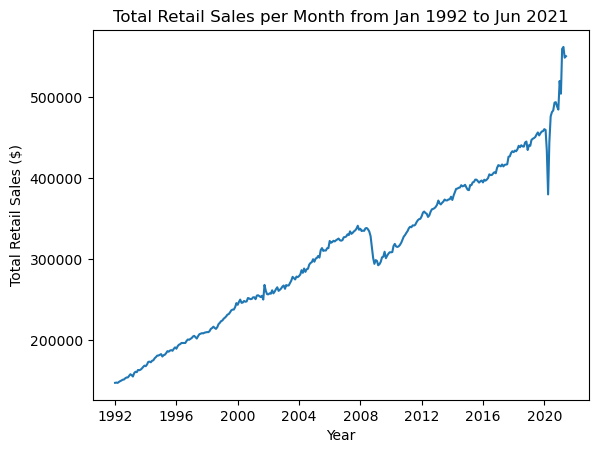

In [15]:
plt.plot(clean_df['DATE'],clean_df['SALES'])
  
# Name the x axis 
plt.xlabel('Year') 
# Name the y axis 
plt.ylabel('Total Retail Sales ($)') 
  
# Add graph title
plt.title('Total Retail Sales per Month from Jan 1992 to Jun 2021') 

# function to show the plot 
plt.show() 

The overall trend in retail sales over 30 years has seen a steady increase and an exponential increase after 2020. There are two obvious dips in the data from 2008-2010 and 2020. These make sense due to the market crash in 2008 and covid in 2020. This is especially true in March and April of 2020 when lockdown was initiated. There is a sharp increase in retail sales in 2021. This could potentially be due to spending upon receipt of stimulus checks and inflation. 

# Additional Observations

## Decomposition

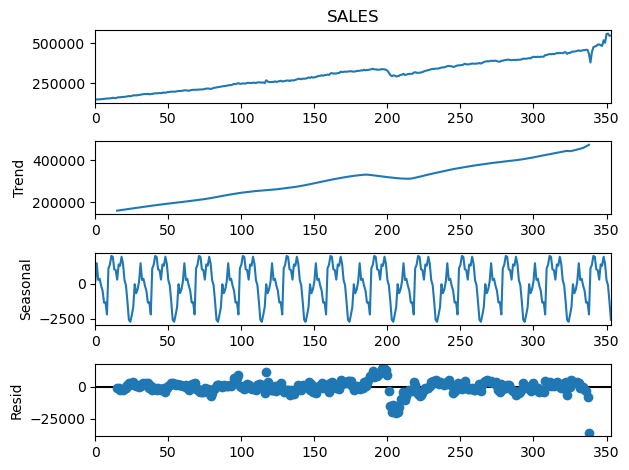

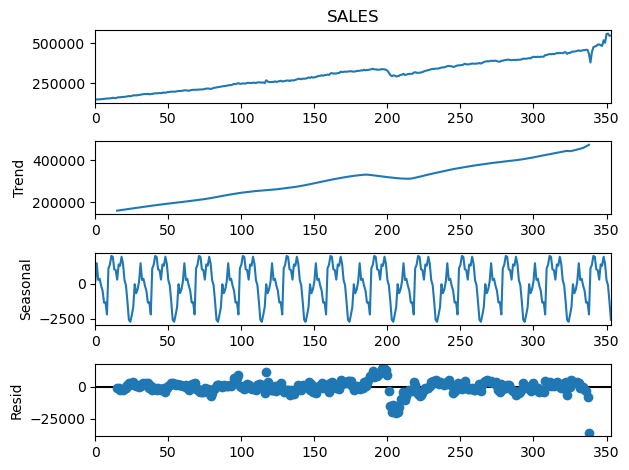

In [16]:
result = seasonal_decompose(clean_df.SALES, period=30)
result.plot()

The decomposition of the retail sales data shows an upward trend and seasonality. 

# Dickey-Fuller test

In [17]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(clean_df.SALES.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: 1.4490526692726307
ADF p-values: 0.9973259755033455
ADF number of lags used: 12
ADF number of observations: 341
ADF critical values: {'1%': -3.449673193310592, '5%': -2.8700533746644323, '10%': -2.5713055939491403}
ADF best information criterion: 6846.754053139283


Since the P-Value of .99 is not less than .05, therefore I assume that the data is non-stationary. This is consistent with the previous observations that show a trend in the retail sales data. I will view ACF and PACF, then repeat with differentiation.

## Autocorrelation Function (ACF)

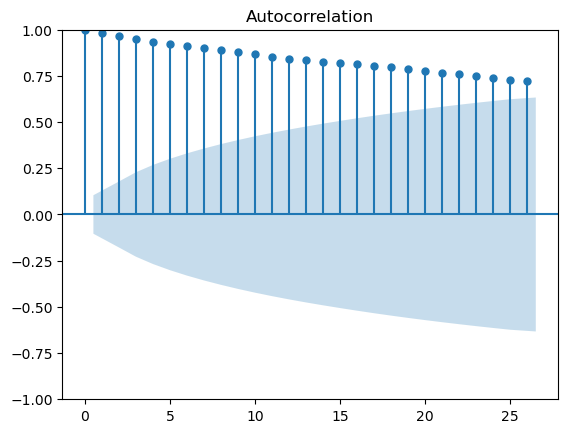

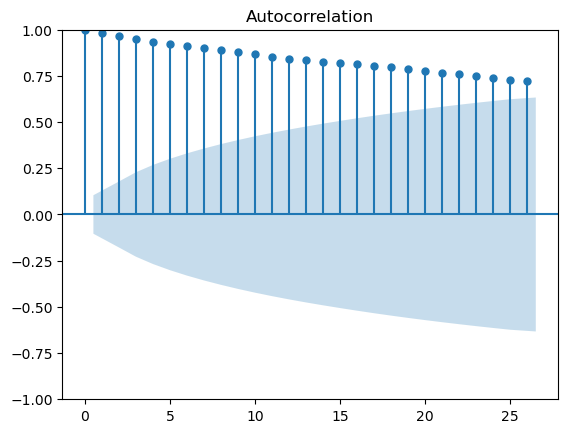

In [18]:
plot_acf(clean_df.SALES)

On the x-axis, you can see the time steps. On the y-axis you can see the amount of correlation of every time step with ‘present’ time. There is significant autocorrelation in this plot.

## Partial Autocorrelation (PACF)

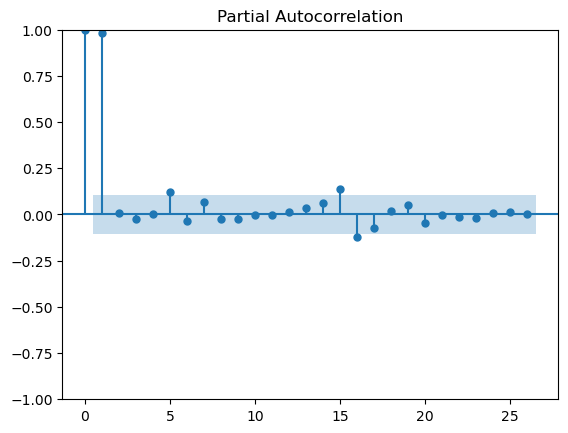

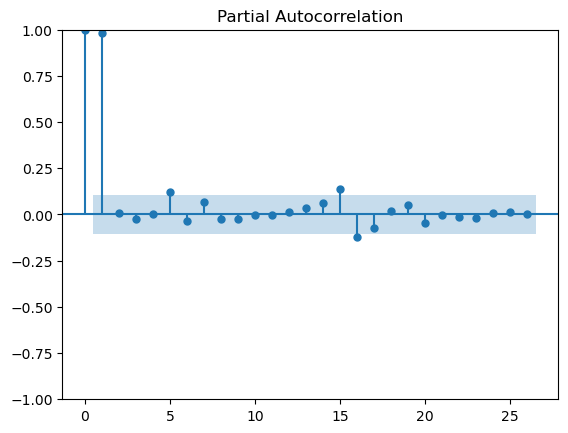

In [19]:
plot_pacf(clean_df.SALES, method='ywm')

There is a strong correlation at the first lag.

Differencing will need to be applied to the retail sales data to account for the trend in the data.

## Differencing

In [20]:
# Add differenced sales to the clean dataframe
clean_df['SALES_diff'] = clean_df['SALES'].diff().fillna(0)

In [21]:
# Test is stationary
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(clean_df.SALES_diff.values)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -2.7363502601726277
ADF p-values: 0.06795652537335
ADF number of lags used: 17
ADF number of observations: 336
ADF critical values: {'1%': -3.449962981927952, '5%': -2.870180642420163, '10%': -2.5713734527352607}
ADF best information criterion: 6844.94232334728


The P-Value is close to .06, but not below.  Since .05 is a rough guideline, let's assume that the differenced data is stationary.

# ACF and PACF after Differencing

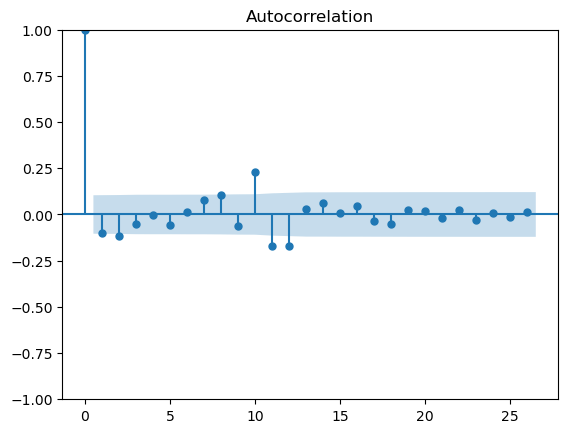

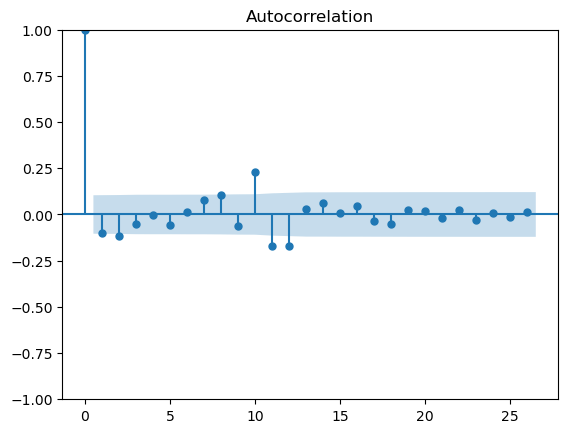

In [22]:
plot_acf(clean_df.SALES_diff)

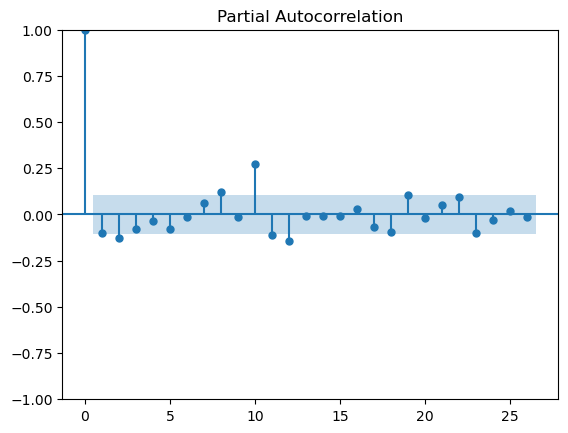

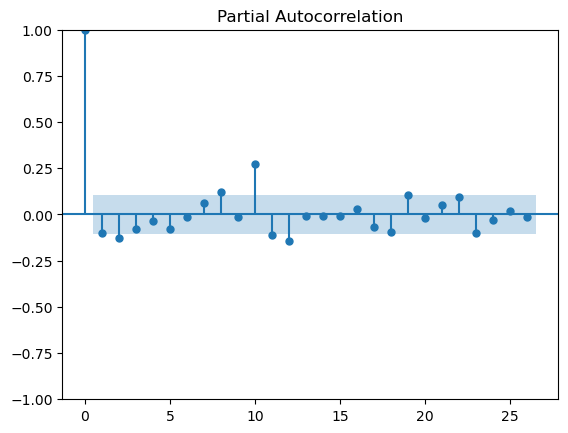

In [23]:
plot_pacf(clean_df.SALES_diff, method='ywm')

The differencing corrected to correlation at the first lag.

# Split the data

Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [24]:
# Create train and test datasets from the clean dataframe
train_df = clean_df[clean_df['DATE'] <= '2020-06-01']
test_df = clean_df[clean_df['DATE'] > '2020-06-01']

In [25]:
# Converting datetime DATE column to split YEAR, MONTH, DAY objects for modeling
train_df['DATE'] = clean_df['DATE'].astype(str) 
train_df[['YEAR', 'MONTH', 'DAY']] = train_df['DATE'].str.split('-', expand=True)
train_df = train_df.drop('DATE', axis=1)

test_df['DATE'] = clean_df['DATE'].astype(str) 
test_df[['YEAR', 'MONTH', 'DAY']] = test_df['DATE'].str.split('-', expand=True)
test_df = test_df.drop('DATE', axis=1)

In [26]:
# View the training dataframe to observe dataframes were split correctly
train_df.tail()

,SALES,SALES_diff,YEAR,MONTH,DAY
337,459610,-976.0,2020,02,01
338,434281,-25329.0,2020,03,01
339,379892,-54389.0,2020,04,01
340,444631,64739.0,2020,05,01
341,476343,31712.0,2020,06,01


In [27]:
# View the test dataframe to observe dataframes were split correctly
test_df.head()

,SALES,SALES_diff,YEAR,MONTH,DAY
342,481627,5284.0,2020,07,01
343,483716,2089.0,2020,08,01
344,493327,9611.0,2020,09,01
345,493991,664.0,2020,10,01
346,488652,-5339.0,2020,11,01


# Build a predictive model
Use the training set to build a predictive model for the monthly retail sales.

## ARIMA model

In [28]:
# Create an ARIMA model with automated optimization of hyperparameters 
model = pm.auto_arima(train_df.SALES, seasonal=True, m=52)

# Predict values
Use the model to predict the monthly retail sales on the last year of data.

In [29]:
# Predict retail sales based on the test dataset
preds = model.predict(test_df.shape[0])

In [30]:
# View predicted values
preds

342    477309.035191
343    478275.070381
344    479241.105572
345    480207.140762
346    481173.175953
347    482139.211144
348    483105.246334
349    484071.281525
350    485037.316716
351    486003.351906
352    486969.387097
353    487935.422287
dtype: float64

# Evaluate the model
Report the RMSE of the model predictions on the test set.

In [31]:
# Calculate mean squared error of the test sales and predicted sales
mse = mean_squared_error(test_df.SALES, preds)

# Calculate the square root of the mean quared error 
rmse = math.sqrt(mse)

# View root mean squared error
rmse

42328.87118594068

This is a pretty high rmse. I will repeat with the differenced sales for comparison.

# Differenced ARIMA

In [32]:
# Create an ARIMA model with automated optimization of hyperparameters on differenced retail sales data
diff_model = pm.auto_arima(train_df.SALES_diff, seasonal=True, m=52)

# Predict differenced retail sales based on the test dataset
diff_preds = diff_model.predict(test_df.shape[0])

# Calculate mean squared error of the test differenced sales and predicted sales
diff_mse = mean_squared_error(test_df.SALES_diff, diff_preds)

# Calculate the square root of the mean quared error 
diff_rmse = math.sqrt(diff_mse)

# View root mean squared error
diff_rmse

23076.29504075843

Using the differenced retail sales improved the rmse by halfing the value from 42,328 to 23,076. 

# Alternative Models

## Random Forest Regression

In [33]:
# Attempt a Random Forest Regression model

# Set train variable
X = train_df[['YEAR','MONTH','DAY']]

# Fit the model
my_rf = RandomForestRegressor()
my_rf.fit(X, train_df.SALES)

# Precit based on test data
X_test = test_df[['YEAR','MONTH','DAY']]
pred_test = my_rf.predict(X_test)

# View predicted values
pred_test

array([462110.51, 461889.65, 461414.21, 461874.49, 462465.67, 462705.05,
       456676.3 , 452158.66, 438208.35, 400750.69, 439202.  , 461970.34])

In [34]:
# View actual values over the last year
test_df.SALES

342    481627
343    483716
344    493327
345    493991
346    488652
347    484782
348    520162
349    504458
350    559871
351    562269
352    548987
353    550782
Name: SALES, dtype: int64

In [35]:
# Calculate mse and rmse
rfr_mse = mean_squared_error(test_df.SALES, pred_test)
rfr_rmse = math.sqrt(rfr_mse)

# View rmse
rfr_rmse

77285.27890912667

The rmse is much higher than the ARIMA rmse. Based on this single evaluation metric, the ARIMA model is a better fit than the random forest regressor.

In [36]:
# Fit model with differenced sales
my_rf_diff = RandomForestRegressor()
my_rf_diff.fit(X, train_df.SALES_diff)

# Precit based on test data
pred_test_diff = my_rf_diff.predict(X_test)

# Calculate mse and rmse
rfr_mse_diff = mean_squared_error(test_df.SALES_diff, pred_test_diff)
rfr_rmse_diff = math.sqrt(rfr_mse_diff)

# View rmse
rfr_rmse_diff

34587.19797552268

Using differenced sales for random forest regression greatly improved the rmse; however, the ARIMA model remains superior.

## Linear Regression

In [37]:
# fit the Linear Regression model
my_lr = LinearRegression()
my_lr.fit(X, train_df.SALES.values)

# Predict on the test period
predsLR = my_lr.predict(X_test)

# Calculate mse and rmse
LR_mse = mean_squared_error(test_df.SALES, predsLR)
LR_rmse = math.sqrt(LR_mse)

# View rmse
LR_rmse

66511.08639264209

## Differenced Linear Regression

In [38]:
# fit the differenced Linear Regression model
my_lr_diff = LinearRegression()
my_lr_diff.fit(X, train_df.SALES_diff.values)

# Predict on the test period
predsLR_diff = my_lr_diff.predict(X_test)

# Calculate the mse and rmse
LR_mse_diff = mean_squared_error(test_df.SALES_diff, predsLR_diff)
LR_rmse_diff = math.sqrt(LR_mse_diff)

# View rmse
LR_rmse_diff

19908.212325145014

The differenced linear regression is over three times stronger than the SLR model on original sales data. This model also has the strongest rmse over the differenced ARIMA model.

# Summary
The retail sales data showed a trend over 30 years. This was evaluated through decomposition, Dickey-Fuller test, ACF, and PCF. To account for the trend in the data, differencing was applied to the sales data. ARIMA, Random Forest Regressor, and Linear Regression were the models fit. Overall, Linear Regression with differenced sales values was the strongest based on the the evaluation metric rmse. 